In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,0
2,LP001256,Male,No,0,Graduate,No,3750,4750.0,176.0,360.0,1.0,Urban,0
3,LP002364,Male,Yes,0,Graduate,No,14880,0.0,96.0,360.0,1.0,Semiurban,1
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1


In [31]:
df.shape

(564, 13)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             553 non-null    object 
 2   Married            561 non-null    object 
 3   Dependents         553 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      534 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         543 non-null    float64
 9   Loan_Amount_Term   551 non-null    float64
 10  Credit_History     516 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 57.4+ KB


In [33]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,564.000000,564.000000,543.000000,551.000000,516.000000,564.000000
mean,5425.664894,1670.040426,145.594843,341.161525,0.843023,0.687943
std,6258.352628,3025.543931,84.967770,66.434063,0.364132,0.463744
min,210.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2892.750000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3813.000000,1211.500000,127.000000,360.000000,1.000000,1.000000
75%,5815.750000,2333.750000,166.500000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [34]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               3
Dependents           11
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     13
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
print(df['Property_Area'].unique())

['Rural' 'Semiurban' 'Urban']


In [38]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

/var/folders/mf/jn4wxcbd2tb79hzk601sjvpw0000gn/T/ipykernel_21623/2402250623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/var/folders/mf/jn4wxcbd2tb79hzk601sjvpw0000gn/T/ipykernel_21623/2402250623.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [39]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df = pd.get_dummies(df, columns=['Married'], drop_first=True)
df = pd.get_dummies(df, columns=['Dependents'], drop_first=True)
df = pd.get_dummies(df, columns=['Education'], drop_first=True)
df = pd.get_dummies(df, columns=['Self_Employed'], drop_first=True)
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

In [41]:
df.dtypes

Loan_ID                     object
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Gender_Male                   bool
Married_Yes                   bool
Dependents_1                  bool
Dependents_2                  bool
Dependents_3+                 bool
Education_Not Graduate        bool
Self_Employed_Yes             bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object

In [42]:
df['Gender_Male'] = df['Gender_Male'].astype(int)
df['Married_Yes'] = df['Married_Yes'].astype(int)
df['Dependents_1'] = df['Dependents_1'].astype(int)
df['Dependents_2'] = df['Dependents_2'].astype(int)
df['Dependents_3+'] = df['Dependents_3+'].astype(int)
df['Education_Not Graduate'] = df['Education_Not Graduate'].astype(int)
df['Self_Employed_Yes'] = df['Self_Employed_Yes'].astype(int)
df['ApplicantIncome'] = df['ApplicantIncome'].astype(float)
df['Credit_History'] = df['Credit_History'].astype(int)
df['Property_Area_Urban'] = df['Property_Area_Urban'].astype(int)
df['Property_Area_Semiurban'] = df['Property_Area_Semiurban'].astype(int)


In [43]:
df.dtypes

Loan_ID                     object
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History               int64
Loan_Status                  int64
Gender_Male                  int64
Married_Yes                  int64
Dependents_1                 int64
Dependents_2                 int64
Dependents_3+                int64
Education_Not Graduate       int64
Self_Employed_Yes            int64
Property_Area_Semiurban      int64
Property_Area_Urban          int64
dtype: object

In [44]:
df = df.drop(['Loan_ID'], axis=1)

In [45]:
df.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,4583.0,1508.0,128.0,360.0,1,0,1,1,1,0,0,0,0,0,0
1,2726.0,0.0,106.0,360.0,0,0,1,1,0,1,0,0,1,1,0
2,3750.0,4750.0,176.0,360.0,1,0,1,0,0,0,0,0,0,0,1
3,14880.0,0.0,96.0,360.0,1,1,1,1,0,0,0,0,0,1,0
4,2583.0,2358.0,120.0,360.0,1,1,1,1,0,0,0,1,0,0,1


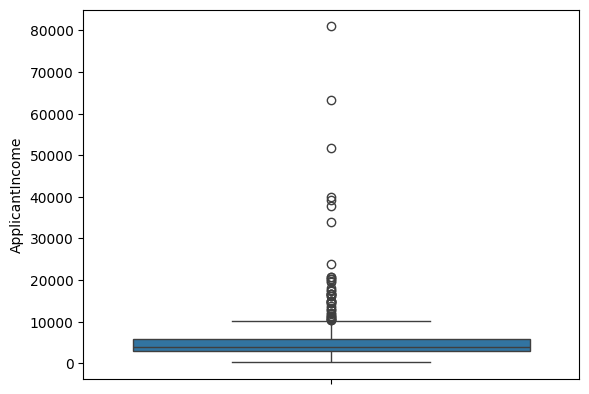

In [46]:
sns.boxplot(df['ApplicantIncome'])
plt.show()


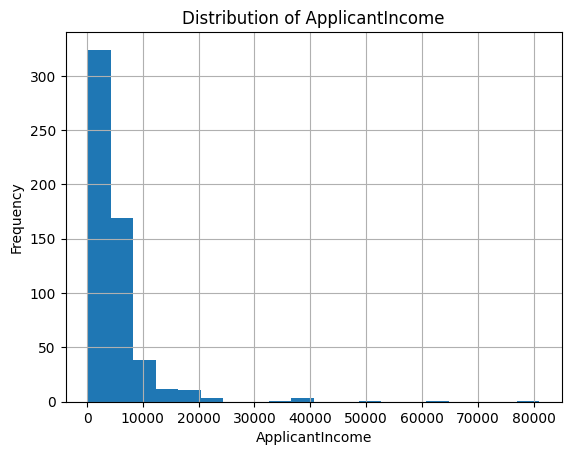

In [47]:
df['ApplicantIncome'].hist(bins=20)
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.title('Distribution of ApplicantIncome')
plt.show()

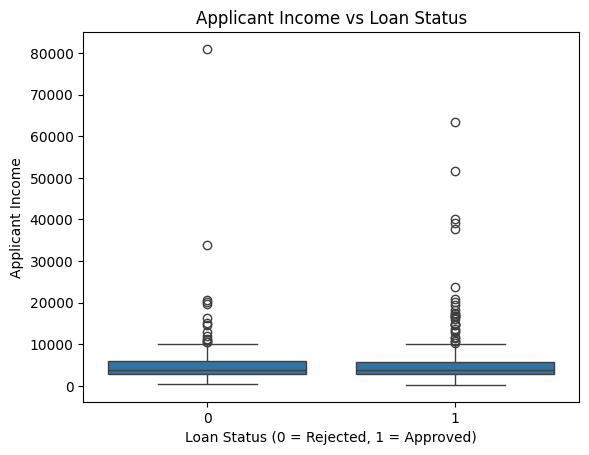

In [48]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income vs Loan Status')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Applicant Income')
plt.show()


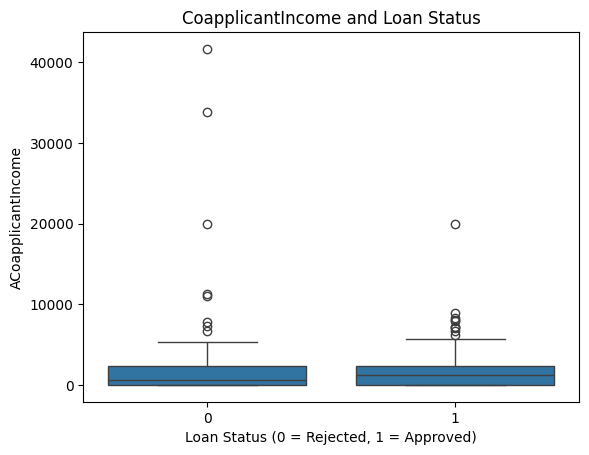

In [49]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)
plt.title('CoapplicantIncome and Loan Status')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('ACoapplicantIncome')
plt.show()

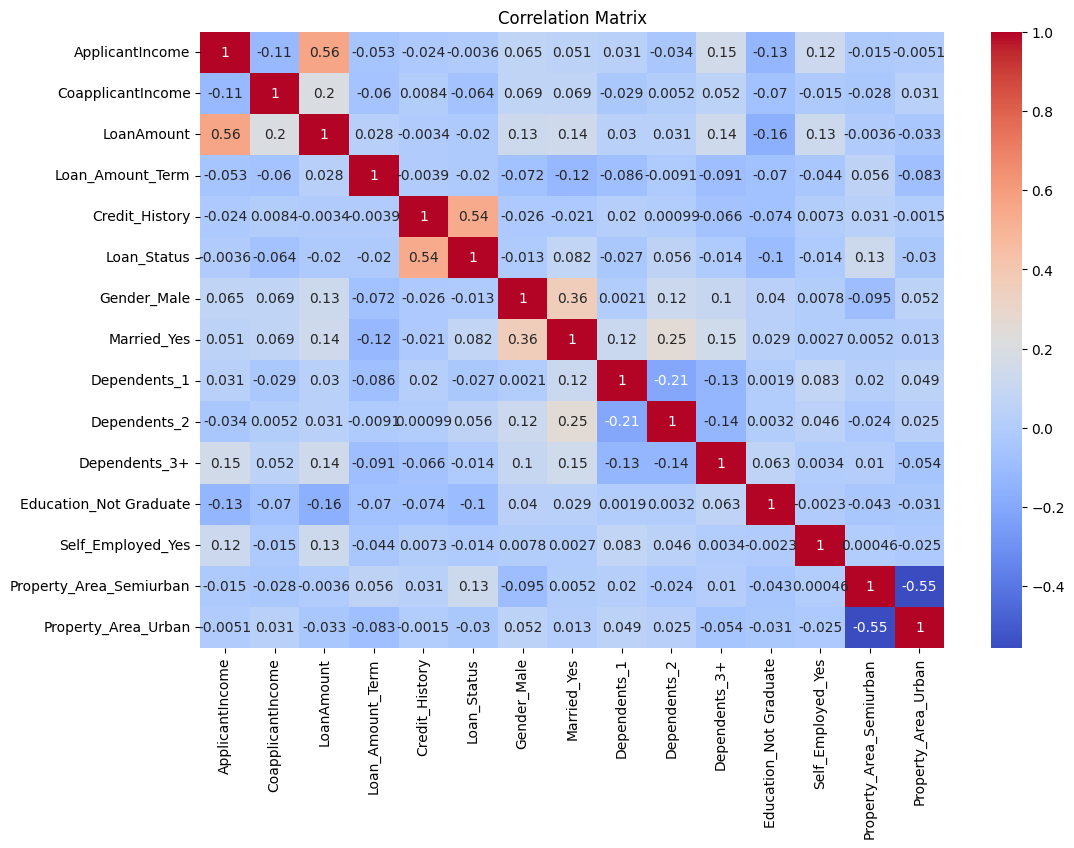

In [50]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

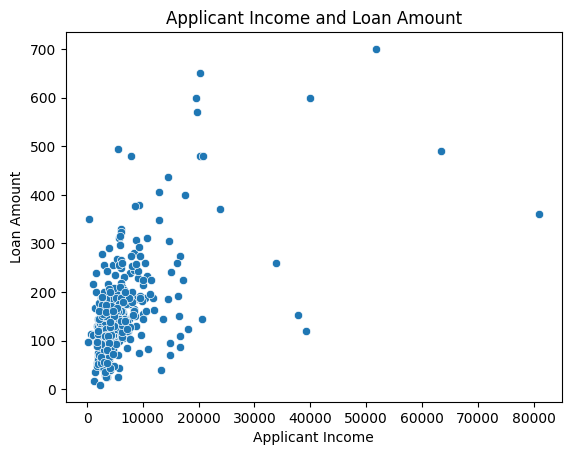

In [51]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title('Applicant Income and Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()


In [53]:
scaler = StandardScaler()
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

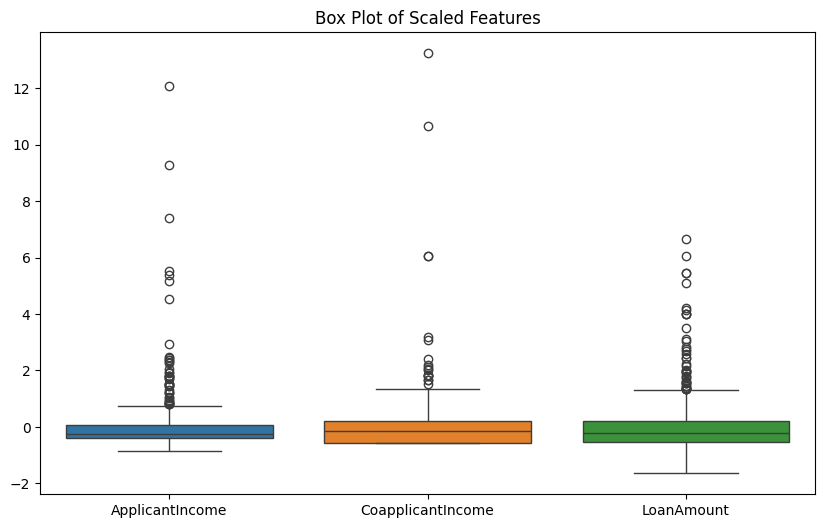

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.title('Box Plot of Scaled Features')
plt.show()


In [57]:
X = df.drop('Loan_Status', axis=1)  
y = df['Loan_Status']  

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=df['Loan_Status'],test_size=0.2, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [59]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression accuracy: {accuracy}')

Logistic Regression accuracy: 0.7787610619469026


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest accuracy: {accuracy}')

Random Forest accuracy: 0.7610619469026548


In [61]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM accuracy: {accuracy}')

SVM accuracy: 0.6902654867256637


In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}, 
    {'C': [0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['saga']} 
]

lr = LogisticRegression(random_state=42, max_iter=500)

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, error_score='raise')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters from Grid Search: {best_params}')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters from Grid Search: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

In [63]:
best_lr = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    random_state=42,
    max_iter=500
)

best_lr.fit(X_train, y_train)

y_pred = best_lr.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression accuracy with best parameters: {accuracy}')
print(classification_report(y_test, y_pred))


Logistic Regression accuracy with best parameters: 0.7876106194690266
              precision    recall  f1-score   support

           0       0.87      0.37      0.52        35
           1       0.78      0.97      0.86        78

    accuracy                           0.79       113
   macro avg       0.82      0.67      0.69       113
weighted avg       0.80      0.79      0.76       113



In [64]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,-0.134766,-0.053605,-0.211238,360.0,1,0,1,1,1,0,0,0,0,0,0
1,-0.431753,-0.552470,-0.475362,360.0,0,0,1,1,0,1,0,0,1,1,0
2,-0.267986,1.018889,0.365034,360.0,1,0,1,0,0,0,0,0,0,0,1
3,1.512016,-0.552470,-0.595418,360.0,1,1,1,1,0,0,0,0,0,1,0
4,-0.454623,0.227586,-0.307283,360.0,1,1,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,-0.301731,-0.097272,-1.087650,360.0,1,0,1,1,0,0,0,0,0,0,0
560,0.014447,3.185711,4.194836,360.0,0,0,1,1,0,0,1,0,0,1,0
561,-0.569771,-0.208094,-0.571407,360.0,1,1,1,1,0,0,0,1,0,1,0
562,-0.134766,0.136612,0.172943,360.0,1,1,1,1,0,1,0,0,1,1,0
